In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = 'dummy_data.csv'

df = pd.read_csv(data)

In [3]:
print(df.shape)
df.columns

(1000, 12)


Index(['age', 'gender', 'time_spent', 'platform', 'interests', 'location',
       'demographics', 'profession', 'income', 'indebt', 'isHomeOwner',
       'Owns_Car'],
      dtype='object')

In [4]:
df.head(5)

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True


In [5]:
#Count how many times repeats each unique value repeats and store it in each variable

country = df['location'].value_counts()
gender = df['gender'].value_counts()
platform = df['platform'].value_counts()
profession = df['profession'].value_counts()
interests = df['interests'].value_counts()

columns_list = [country, gender, platform, profession, interests] #Create a list that contains each column-variable

for column in columns_list:                         #Loop to show results in order
    print(column.to_string(header=False), "\n")

Australia         352
United Kingdom    329
United States     319 

male          337
non-binary    332
female        331 

Instagram    363
YouTube      330
Facebook     307 

Marketer Manager     355
Software Engineer    336
Student              309 

Lifestlye    341
Sports       331
Travel       328 



In [6]:
#Calculate the average time spent in social media separated by gender and then print the results

male = round(df[df['gender'] == 'male']['time_spent'].mean(), 1)
female = round(df[df['gender'] == 'female']['time_spent'].mean(), 1)        #round() has been used for limit the floats
non_binary = round(df[df['gender'] == 'non-binary']['time_spent'].mean(), 1)

print(f'The mean time spented in social media of men is: {male} hours.')
print(f'\nThe mean time spented in social media of women is: {female} hours.')       #Show results
print(f'\nThe mean time spented in social media of non-binary people is: {non_binary} hours.')

The mean time spented in social media of men is: 4.8 hours.

The mean time spented in social media of women is: 5.2 hours.

The mean time spented in social media of non-binary people is: 5.1 hours.


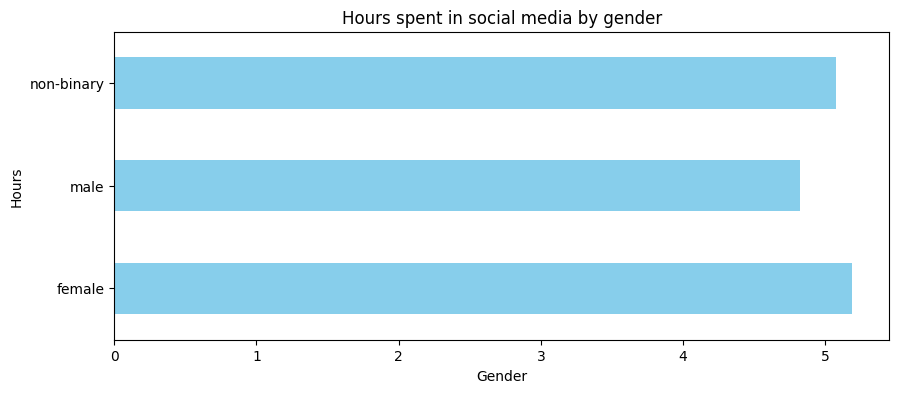

In [7]:
#Group by gender for then calculate the mean time spent in social media for each gender

gender_income = df.groupby('gender')['time_spent'].mean()

plt.figure(figsize=(10, 4))
gender_income.plot(kind='barh', color='skyblue')
plt.xlabel('Gender')
plt.ylabel('Hours')
plt.title('Hours spent in social media by gender')

plt.show()

In [8]:
#Separate the income by gender and then calculate the mean salary for each gender

male = round(df[df['gender'] == 'male']['income'].mean())
female = round(df[df['gender'] == 'female']['income'].mean())        #round() has been used for limit the floats
non_binary = round(df[df['gender'] == 'non-binary']['income'].mean())

print(f'The mean income of the men is: ${male}.')
print(f'\nThe mean income of the woman is: ${female}.')                #Show results
print(f'\nThe mean income of the non-binary people is: ${non_binary}.')


The mean income of the men is: $14920.

The mean income of the woman is: $15186.

The mean income of the non-binary people is: $14941.


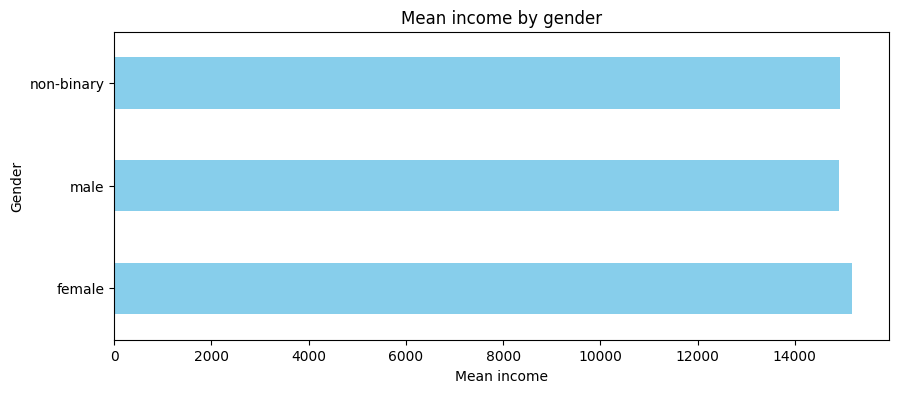

In [9]:
#Group by gender for then calculate the mean income for each gender

gender_income = df.groupby('gender')['income'].mean()

plt.figure(figsize=(10, 4))
gender_income.plot(kind='barh', color='skyblue')
plt.xlabel('Mean income')
plt.ylabel('Gender')
plt.title('Mean income by gender')

plt.show()


In [10]:
#Group by gender for make a count of hoy many persons of each gender has a car or not

gender_car = df.groupby('gender')['Owns_Car'].count()

no_car_gender = df[df['Owns_Car'] == False].groupby('gender')['Owns_Car'].count()   #First, select the rows where ['Owns_Car'] is False, then group by the 3 genders

car_gender = df[df['Owns_Car'] == True].groupby('gender')['Owns_Car'].count()   #First, select the rows where ['Owns_Car'] is True, then group by the 3 genders                                                                          

print(f"Number of people without a car by gender: \n{no_car_gender.to_string(header=False)}")   #Show Results
print(f"\nNumber of people with a car by gender: \n{car_gender.to_string(header=False)}")



Number of people without a car by gender: 
female        147
male          146
non-binary    168

Number of people with a car by gender: 
female        184
male          191
non-binary    164


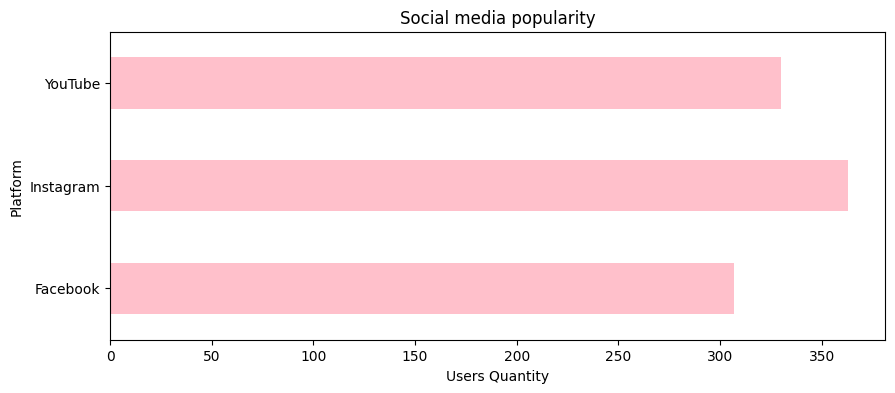

How many people use each social media? 
Facebook     307
Instagram    363
YouTube      330


In [11]:
#Group how many persons of each gender use each one of the 3 networks

platform = df.groupby('platform')['gender'].count()

plt.figure(figsize=(10, 4))

platform.plot(kind='barh', color='pink')
plt.ylabel('Platform')
plt.xlabel('Users Quantity')
plt.title('Social media popularity')

plt.show()

print(f"How many people use each social media? \n{platform.to_string(header=False)}")   #Show results, where to_string(header=False) is used to generate a more clean print of the results

In [12]:
#Group each profession by each gender, for make a count of how many of each gender dedicates to each one of the 3 professions

profession = df.groupby('profession')['gender'].count()

#Store in a different variable each profession, gruoped by gender
    # -> After grouping, make a count of how many people of each gender dedicates to each profession
        # -> Renames the profession column by the name of the variable and the profession assigned to these variable

profession_genderMM = df[df['profession'] == 'Marketer Manager'].groupby('gender')['profession'].count().rename('Marketer Manager')
profession_genderSE = df[df['profession'] == 'Software Engineer'].groupby('gender')['profession'].count().rename('Software Engineer')
profession_genderS = df[df['profession'] == 'Student'].groupby('gender')['profession'].count().rename('Student')

print(f"Quantity of Marketer Managers of each gender: \n{profession_genderMM.to_string(header=False)}")
print(f"\nQuantity of Software Engineers of each gender: \n{profession_genderSE.to_string(header=False)}")   #Show Results
print(f"\nQuantity of Students of each gender: \n{profession_genderS.to_string(header=False)}")

Quantity of Marketer Managers of each gender: 
female        108
male          120
non-binary    127

Quantity of Software Engineers of each gender: 
female        115
male          116
non-binary    105

Quantity of Students of each gender: 
female        108
male          101
non-binary    100


In [13]:
#A variable is created with a list of the previous variables, wich divide the quantity of people dedicated to these professions
profession_list = [profession_genderMM, profession_genderSE, profession_genderS]

#A DataFrame is created with the data of the variables, extracted for the original DataFrame
profession_df = pd.DataFrame(profession_list)

#Indices and columns are correctly placed with the function transpose()
profession_df.transpose()

,Marketer Manager,Software Engineer,Student
gender,,,
female,108,115,108
male,120,116,101
non-binary,127,105,100


<Figure size 1000x400 with 0 Axes>

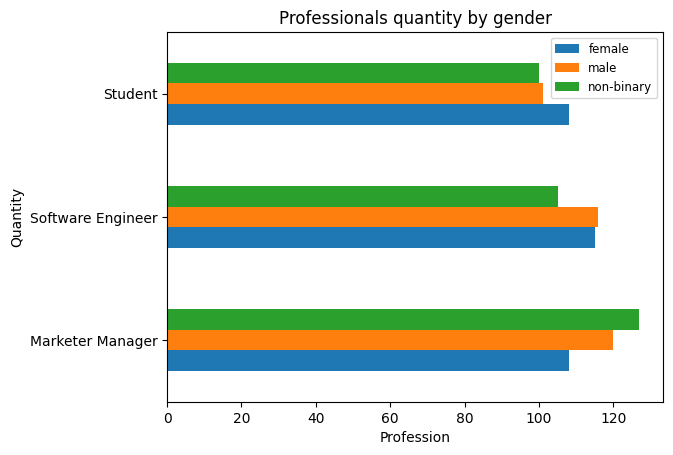

In [14]:
#Graphic for visualize the quantity of professionals by gender

plt.figure(figsize=(10, 4))

profession_df.plot(kind='barh')
plt.ylabel('Quantity')
plt.xlabel('Profession')
plt.title('Professionals quantity by gender')
plt.legend(fontsize='8.5')
plt.show()

In [15]:
#Grouping by gender who owns a property or not

gender_house = df.groupby('gender')['isHomeOwner'].count()

no_house_gender = df[df['isHomeOwner'] == False].groupby('gender')['isHomeOwner'].count() #Store in a a variable no_house the registers where ['isHomeOwner']=False and makes a count

w_house_gender = df[df['isHomeOwner'] == True].groupby('gender')['isHomeOwner'].count()  #Store in a a variable w_house_gender the registers where ['isHomeOwner']=True and makes a count

print(f"Quantity of persons who no owns a house by gender: \n{no_house_gender.to_string(header=False)}")    #Show results
print(f"\nQuantity of persons who owns a house by gender \n{w_house_gender.to_string(header=False)}")

Quantity of persons who no owns a house by gender: 
female        159
male          171
non-binary    162

Quantity of persons who owns a house by gender 
female        172
male          166
non-binary    170


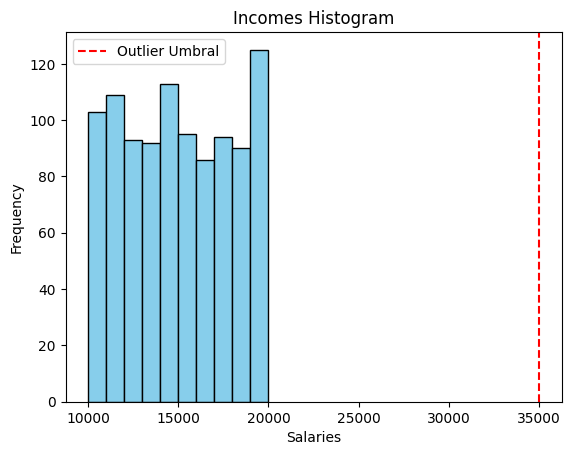

In [16]:
#Verifying outliers in the income column

incomes = df['income']     #Variable that select the ['income'] column

plt.hist(incomes, bins=10, color='skyblue', edgecolor='black')     #Histogram with the income column

plt.xlabel('Salaries')
plt.ylabel('Frequency')
plt.title('Incomes Histogram')

umbral_outlier = 35000       #The outlier threshold is defined where subsequently x='umbral_outlier' (25.000)

plt.axvline(x=umbral_outlier, color='red', linestyle='--', label='Outlier Umbral')

plt.legend()
plt.show()

#Results = outliers didn't has observed